<a href="https://colab.research.google.com/github/satani99/sklearn_classifier/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload the kaggle.json file(kaggle api)

In [2]:
!ls -lha /content/kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!pwd

-rw-r--r-- 1 root root 68 Jul  9 08:13 /content/kaggle.json
/content


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:17<00:00, 33.3MB/s]
100% 812M/812M [00:17<00:00, 47.5MB/s]


In [5]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os

image_size = 32

In [8]:
print("Training and Testing files:",len(os.listdir("/content/train")))

Training and Testing files: 25000


In [9]:
train_files = os.listdir("/content/train")
categories = []
for img in train_files:
    categories.append(img.split('.')[0])
y = np.array(categories)
print(y)

['dog' 'cat' 'cat' ... 'dog' 'cat' 'dog']


In [10]:
def get_image_arr(path):
        img = cv2.imread(path, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (image_size, image_size)).reshape(1,-1)
        return img

In [11]:
def get_features_count(path):
        img = cv2.imread(path, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (image_size, image_size)).reshape(-1,1)
        return len(img)

In [15]:
features_count = get_features_count("/content/train" + '/' + train_files[0])
print('Features count: ',features_count)

Features count:  3072


In [ ]:
X = np.ones((1,features_count), int)
advance = 0

for x in train_files:
    X = np.append(X,get_image_arr("/content/train" + '/' + x),axis = 0)
    print(i)


print('X traing array generated',X)

In [20]:
X = np.delete(X, (0), axis=0)

print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (25000, 3072)
y shape: (25000,)


##Training with 10,000 images

In [22]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:15000], y[:10000], y[10000:15000]

print('X Train shape:',X_train.shape)
print('X Test shape:',X_test.shape)
print('Y Train shape:',y_train.shape)
print('Y Test shape:',y_test.shape)

X Train shape: (10000, 3072)
X Test shape: (5000, 3072)
Y Train shape: (10000,)
Y Test shape: (5000,)


In [23]:
train_scaler = preprocessing.RobustScaler().fit(X_train)
x_scaled = train_scaler.transform(X_train)

test_scaler = preprocessing.RobustScaler().fit(X_test)
test_scaled = test_scaler.transform(X_test)

In [34]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_scaled, y_train)

y_prima = sgd_clf.predict(test_scaled)
print(y_prima)

['cat' 'cat' 'cat' ... 'dog' 'dog' 'dog']


In [35]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.55      0.50      0.52      2518
         dog       0.54      0.59      0.56      2482

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000



In [36]:
accuracy_score(y_test, y_prima)

0.5428

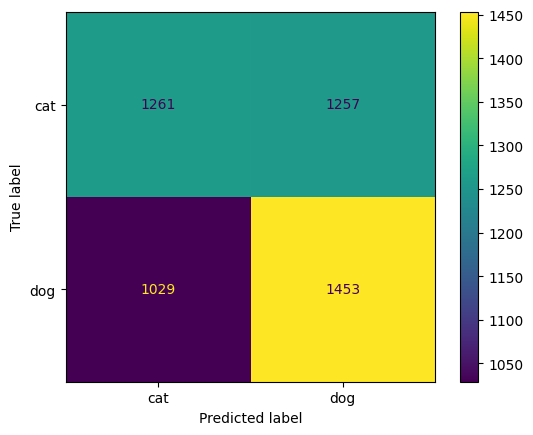

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=sgd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_scaled, y_train)

y_prima = knn_clf.predict(test_scaled)
print(y_prima)

['cat' 'cat' 'cat' ... 'cat' 'cat' 'cat']


In [39]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.54      0.74      0.62      2518
         dog       0.57      0.35      0.44      2482

    accuracy                           0.55      5000
   macro avg       0.55      0.55      0.53      5000
weighted avg       0.55      0.55      0.53      5000



In [40]:
accuracy_score(y_test, y_prima)

0.5478

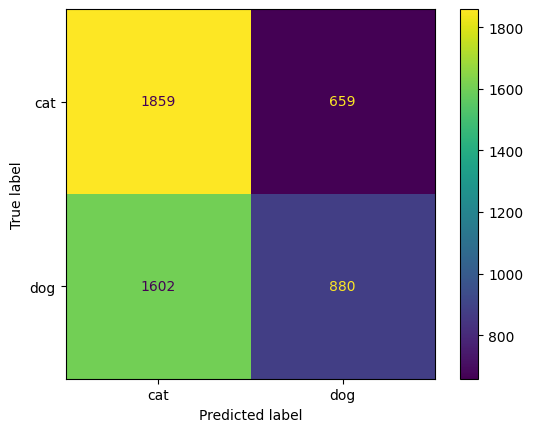

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_scaled, y_train)

y_prima = dtc_clf.predict(test_scaled)
print(y_prima)

['cat' 'cat' 'cat' ... 'dog' 'cat' 'dog']


In [43]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.57      0.57      0.57      2518
         dog       0.56      0.56      0.56      2482

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



In [44]:
accuracy_score(y_test, y_prima)

0.5628

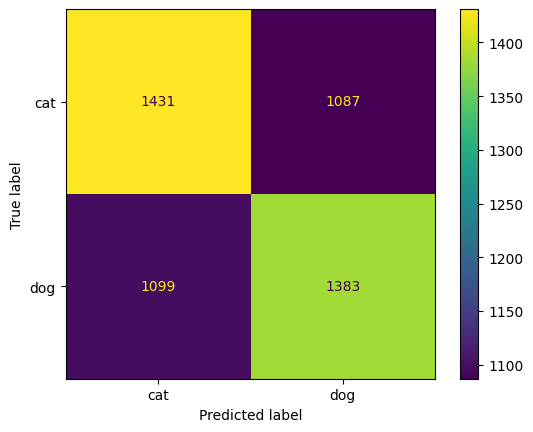

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=dtc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_)
disp.plot()
plt.show()

##Training with 20,000 images

In [46]:
X_train, X_test, y_train, y_test = X[:20000], X[20000:25000], y[:20000], y[20000:25000]

print('X Train shape:',X_train.shape)
print('X Test shape:',X_test.shape)
print('Y Train shape:',y_train.shape)
print('Y Test shape:',y_test.shape)

X Train shape: (20000, 3072)
X Test shape: (5000, 3072)
Y Train shape: (20000,)
Y Test shape: (5000,)


In [47]:
train_scaler = preprocessing.RobustScaler().fit(X_train)
x_scaled = train_scaler.transform(X_train)

test_scaler = preprocessing.RobustScaler().fit(X_test)
test_scaled = test_scaler.transform(X_test)

In [48]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_scaled, y_train)

y_prima = sgd_clf.predict(test_scaled)
print(y_prima)

['dog' 'cat' 'cat' ... 'cat' 'cat' 'dog']


In [49]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.58      0.58      0.58      2534
         dog       0.57      0.57      0.57      2466

    accuracy                           0.57      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.57      0.57      0.57      5000



In [50]:
accuracy_score(y_test, y_prima)

0.5732

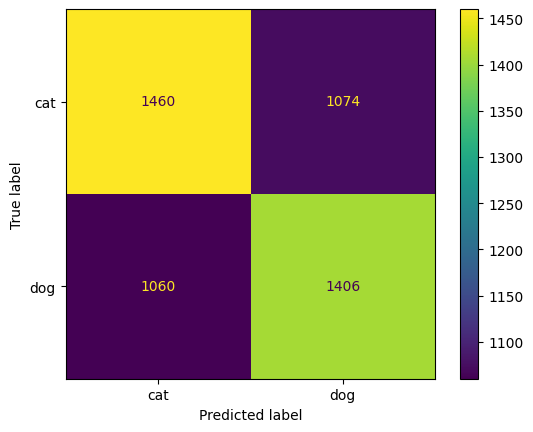

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=sgd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_scaled, y_train)

y_prima = knn_clf.predict(test_scaled)
print(y_prima)

['cat' 'cat' 'cat' ... 'cat' 'cat' 'cat']


In [53]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.55      0.74      0.63      2534
         dog       0.59      0.38      0.46      2466

    accuracy                           0.56      5000
   macro avg       0.57      0.56      0.55      5000
weighted avg       0.57      0.56      0.55      5000



In [54]:
accuracy_score(y_test, y_prima)

0.5638

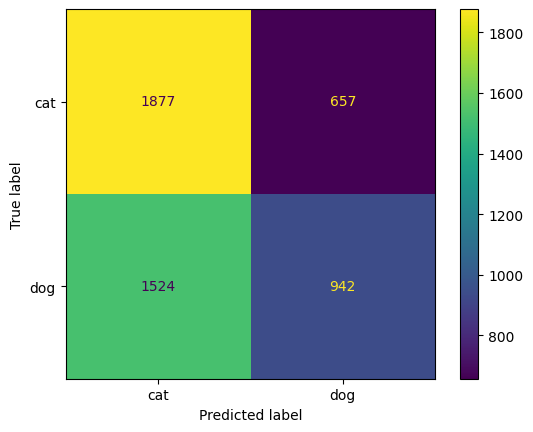

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_scaled, y_train)

y_prima = dtc_clf.predict(test_scaled)
print(y_prima)

['cat' 'cat' 'cat' ... 'dog' 'dog' 'dog']


In [58]:
print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

         cat       0.57      0.55      0.56      2534
         dog       0.56      0.57      0.57      2466

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



In [59]:
accuracy_score(y_test, y_prima)

0.5638

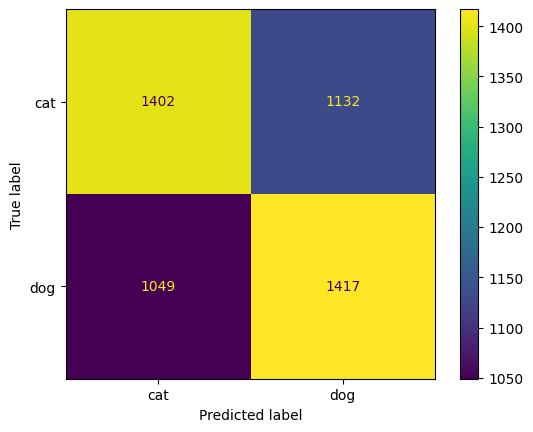

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prima, labels=dtc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_)
disp.plot()
plt.show()